### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()

Данные о недвижимости хранятся в массиве по ключу "data".

In [3]:
data = boston["data"]

Названия признаков хранятся в массиве по ключу "feature_names":

In [4]:
feature_names = boston["feature_names"]

массив с целевыми значениями можно получить по ключу "target":

In [5]:
target = boston["target"]

В таблице X будут храниться признаки

In [6]:
X = pd.DataFrame(data, columns=feature_names)

В таблицу y запишем целевые значения:

In [7]:
y = pd.DataFrame(target, columns=["price"])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.846708e-16,6.375538e-17,3.063556e-15,-5.056461e-17,-5.222445e-15,-4.018788e-15,-9.904069e-16,-3.396623e-16,-2.748077e-17,-1.516938e-16,1.999721e-14,5.737984e-15,-1.725792e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-5.003201e-01,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-5.003201e-01,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,2.098797e-01,-8.005057e-01
50%,-3.776748e-01,-5.003201e-01,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,3.830012e-01,-2.157763e-01
75%,-4.582119e-02,3.645893e-01,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,1.578434e+00,8.453428e-01,4.316600e-01,5.513070e-01
max,9.630689e+00,3.824227e+00,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653990e+00,4.441800e-01,3.592534e+00


Масштабировать тестовый датасет будем по тренеровочному

In [11]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
X_test_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.002462,-0.044123,0.109307,-0.050203,-0.075497,-0.218831,0.003276,-0.030652,0.111584,0.125688,0.305805,0.021464,0.136714
std,0.841556,1.041491,0.976256,0.916046,0.923813,0.936848,1.033283,0.944640,1.067933,1.069264,0.808906,0.991129,1.020140
min,-0.406450,-0.500320,-1.528453,-0.278089,-1.399166,-3.887942,-2.230181,-1.239834,-0.974048,-1.301658,-2.389244,-3.822705,-1.348623
25%,-0.397307,-0.500320,-0.709046,-0.278089,-0.920682,-0.628927,-0.885415,-0.725479,-0.624360,-0.736787,0.036696,0.204932,-0.671661
50%,-0.383485,-0.500320,-0.057369,-0.278089,-0.208272,-0.205189,0.219725,-0.213661,-0.507797,-0.355687,0.396095,0.392842,-0.017229
75%,0.103039,-0.500320,1.033237,-0.278089,0.553050,0.230546,0.953803,0.449420,1.706891,1.578434,0.845343,0.444180,0.782946
max,4.753684,3.608000,2.433163,3.595975,2.675394,2.424744,1.124581,3.242576,1.706891,1.849573,1.653990,0.444180,3.453128


In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [13]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Диаграмма рассеяния

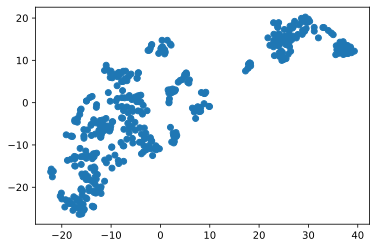

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()